In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
from google.colab import data_table

In [3]:
crime = pd.read_csv('/content/Crimes_-_2001_to_Present_20240224.csv')

In [4]:
crime.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
crime.shape

(8004120, 22)

In [6]:
new = crime[['Case Number', 'Primary Type', 'Arrest', 'Community Area', 'Year']]

In [7]:
new.head(2)

,Case Number,Primary Type,Arrest,Community Area,Year
0,JA371270,DECEPTIVE PRACTICE,False,32.0,2015
1,JC213749,DECEPTIVE PRACTICE,False,19.0,2018


In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004120 entries, 0 to 8004119
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Case Number     object 
 1   Primary Type    object 
 2   Arrest          bool   
 3   Community Area  float64
 4   Year            int64  
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 251.9+ MB


In [9]:
ses = pd.read_csv('/content/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012_20240224.csv')

In [10]:
ses.head(2)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0


In [11]:
ses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [12]:
all = ses.merge(new, how = 'inner', left_on='Community Area Number', right_on='Community Area')

In [13]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004044 entries, 0 to 8004043
Data columns (total 14 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   Community Area Number                         float64
 1   COMMUNITY AREA NAME                           object 
 2   PERCENT OF HOUSING CROWDED                    float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              float64
 4   PERCENT AGED 16+ UNEMPLOYED                   float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  float64
 6   PERCENT AGED UNDER 18 OR OVER 64              float64
 7   PER CAPITA INCOME                             int64  
 8   HARDSHIP INDEX                                float64
 9   Case Number                                   object 
 10  Primary Type                                  object 
 11  Arrest                                        bool   
 12  Community Area                                float64
 1

In [14]:
all.head(2)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Case Number,Primary Type,Arrest,Community Area,Year
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,JC215281,DECEPTIVE PRACTICE,False,1.0,2018
1,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,JC209083,THEFT,False,1.0,2019


In [41]:
CommByType = all.groupby(['Community Area Number', 'COMMUNITY AREA NAME', 'Primary Type']).size().reset_index(name='CommByType')
CommByType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Community Area Number  2404 non-null   float64
 1   COMMUNITY AREA NAME    2404 non-null   object 
 2   Primary Type           2404 non-null   object 
 3   CommByType             2404 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 75.2+ KB


In [47]:
#Get the most prevalent crime type for each community area
CommByTypeNew = CommByType.sort_values(['Community Area Number','CommByType'],ascending=[True, False]).groupby('Community Area Number').head(1)
CommByTypeNew['Community Area Number'] = CommByTypeNew['Community Area Number'].astype("Int64")
CommByTypeNew

,Community Area Number,COMMUNITY AREA NAME,Primary Type,CommByType
30,1,Rogers Park,THEFT,25754
62,2,West Ridge,THEFT,23371
93,3,Uptown,THEFT,27300
124,4,Lincoln Square,THEFT,14941
153,5,North Center,THEFT,13806
185,6,Lake View,THEFT,56275
217,7,Lincoln Park,THEFT,51056
251,8,Near North Side,THEFT,107967
278,9,Edison Park,THEFT,1565
308,10,Norwood Park,THEFT,8420


In [17]:
Total = CommByTypeNew.merge(ses, how = 'left', left_on='Community Area Number', right_on='Community Area Number')
Total['Community Area Number'] = Total['Community Area Number'].astype("Int64")

In [59]:
Total.rename(columns = {'COMMUNITY AREA NAME': 'Community Area Name', 'CommByType': 'Number of Cases Reported', 'HARDSHIP INDEX': 'Hardship Index'}, inplace=True)
Total[['Community Area Number', 'Community Area Name', 'Primary Type', 'Number of Cases Reported', 'Hardship Index']]

,Community Area Number,Community Area Name,Primary Type,Number of Cases Reported,Hardship Index
0,1,Rogers Park,THEFT,25754,39.0
1,2,West Ridge,THEFT,23371,46.0
2,3,Uptown,THEFT,27300,20.0
3,4,Lincoln Square,THEFT,14941,17.0
4,5,North Center,THEFT,13806,6.0
5,6,Lake View,THEFT,56275,5.0
6,7,Lincoln Park,THEFT,51056,2.0
7,8,Near North Side,THEFT,107967,1.0
8,9,Edison Park,THEFT,1565,8.0
9,10,Norwood Park,THEFT,8420,21.0


In [60]:
Total.shape

(77, 11)

In [61]:
#Check if there is missing data in the number of crimes by type (CommByType)
Total.isnull().sum()

Community Area Number                           0
Primary Type                                    0
Number of Cases Reported                        0
Community Area Name                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
Hardship Index                                  0
dtype: int64

In [62]:
community_area_map = gpd.read_file('/content/Boundaries - Community Areas (current).geojson')

In [63]:
community_area_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   area        77 non-null     object  
 2   shape_area  77 non-null     object  
 3   perimeter   77 non-null     object  
 4   area_num_1  77 non-null     object  
 5   area_numbe  77 non-null     object  
 6   comarea_id  77 non-null     object  
 7   comarea     77 non-null     object  
 8   shape_len   77 non-null     object  
 9   geometry    77 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 6.1+ KB


In [64]:
community_area_map['area_numbe'] = community_area_map['area_numbe'].astype("Int64")

In [65]:
data_map = community_area_map.merge(Total, left_on='area_numbe', right_on = 'Community Area Number')

In [67]:
data_map.groupby("Primary Type")['Number of Cases Reported'].size().reset_index(name='Number of Crimes')

,Primary Type,Number of Crimes
0,BATTERY,25
1,CRIMINAL DAMAGE,1
2,NARCOTICS,4
3,THEFT,47


In [68]:
from matplotlib import cm
keys = list(data_map["Primary Type"].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = [cm.tab20b(x) for x in color_range]
color_dict = dict(zip(keys, colors))

In [69]:
row_num = data_map["Primary Type"].nunique()
row_num

4

<ipython-input-70-68621ed48555>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((row_num, row_num+1),(0,1), rowspan=4, colspan=4)
<ipython-input-70-68621ed48555>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((row_num, row_num+1),(0,0))
<ipython-input-70-68621ed48555>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax3 = plt.subplot2grid((row_num, row_num+1),(1,0))
<ipython-input-70-68621ed48555>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() 

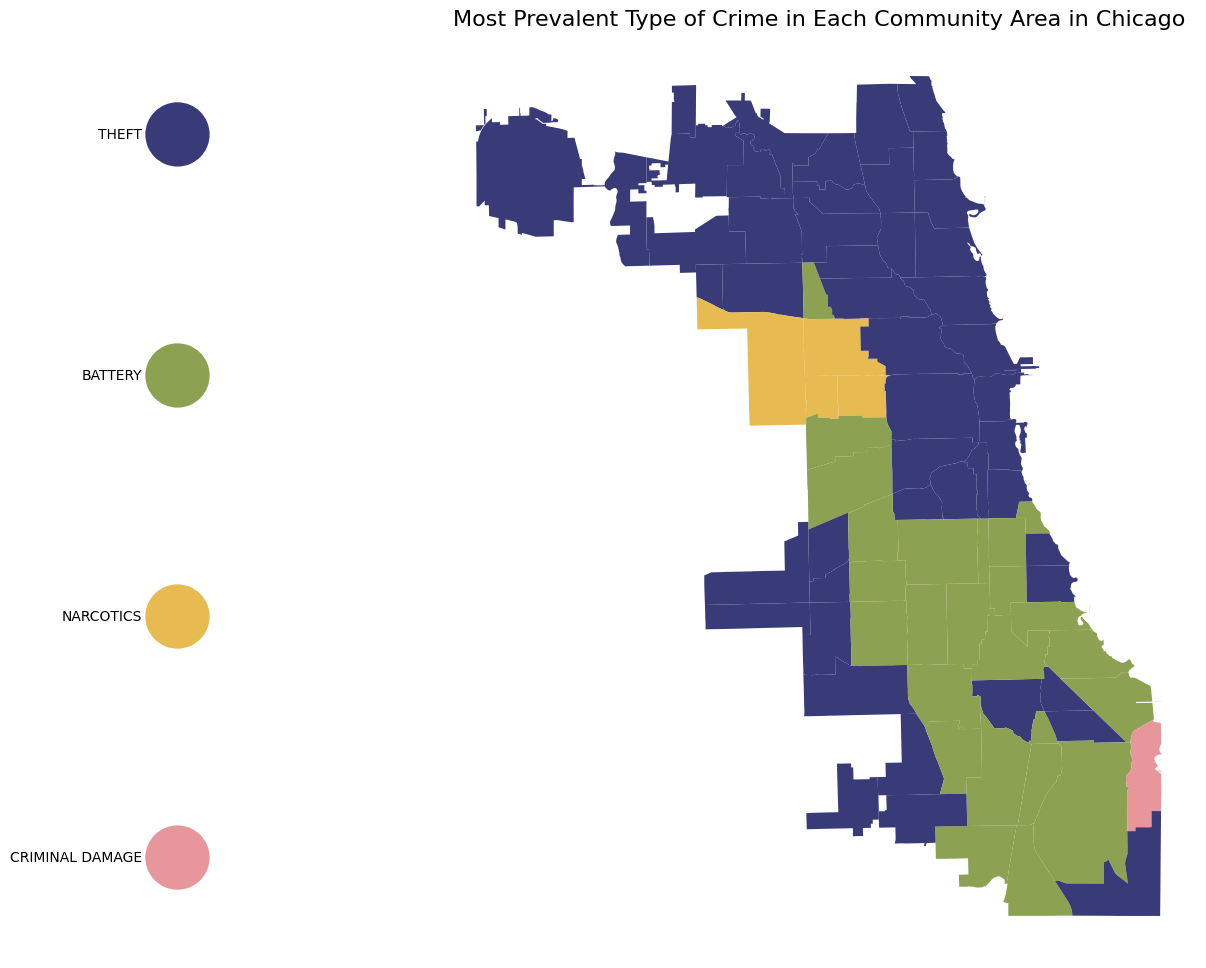

In [70]:
fig, ax = plt.subplots(row_num, row_num+1, figsize=(16, 12))

ax1 = plt.subplot2grid((row_num, row_num+1),(0,1), rowspan=4, colspan=4)
for index, row in data_map.iterrows():
    plot = data_map[data_map["Community Area Number"] == row["Community Area Number"]].plot(color=color_dict[row["Primary Type"]], ax=ax1)
    ax1.axis("off")
    ax1.set_title("Most Prevalent Type of Crime in Each Community Area in Chicago", size=16)

ax2 = plt.subplot2grid((row_num, row_num+1),(0,0))
ax2 = plt.pie([1],labels=[data_map["Primary Type"].unique()[0]],radius=0.4, colors=[color_dict[data_map["Primary Type"].unique()[0]]])

ax3 = plt.subplot2grid((row_num, row_num+1),(1,0))
ax3 = plt.pie([1],labels=[data_map["Primary Type"].unique()[1]],radius=0.4, colors=[color_dict[data_map["Primary Type"].unique()[1]]])

ax4 = plt.subplot2grid((row_num, row_num+1),(2,0))
ax4 = plt.pie([1],labels=[data_map["Primary Type"].unique()[2]],radius=0.4, colors=[color_dict[data_map["Primary Type"].unique()[2]]])

ax5 = plt.subplot2grid((row_num, row_num+1),(3,0))
ax5 = plt.pie([1],labels=[data_map["Primary Type"].unique()[3]],radius=0.4, colors=[color_dict[data_map["Primary Type"].unique()[3]]])

plt.show()

<ipython-input-33-0ce2352b7799>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((row_num, row_num+1),(0,1), rowspan=row_num, colspan=row_num)
<ipython-input-33-0ce2352b7799>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot2grid((row_num, row_num+1),(row_counter,0))


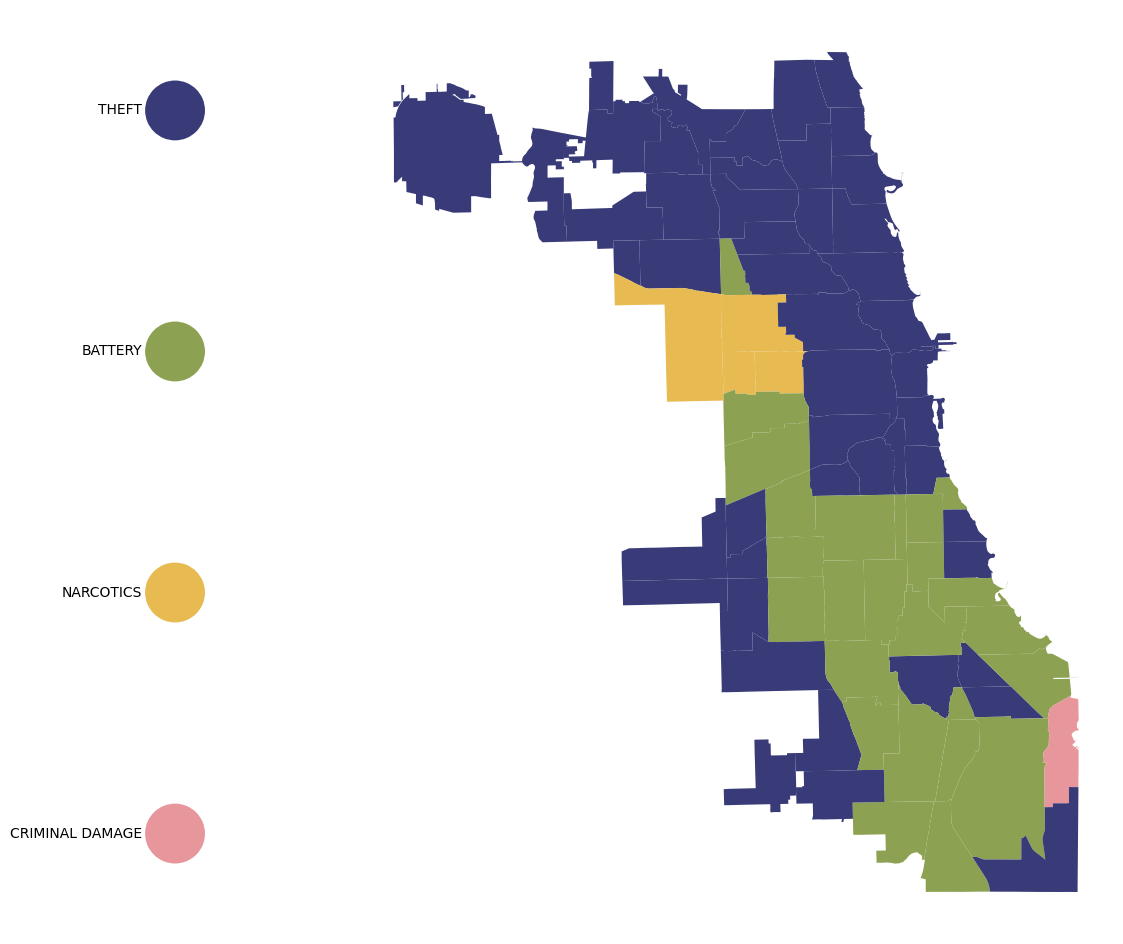

In [ ]:
#An alternative way to generate the map
# fig, ax = plt.subplots(row_num, row_num+1, figsize=(14, 12))

# ax1 = plt.subplot2grid((row_num, row_num+1),(0,1), rowspan=row_num, colspan=row_num)
# for index, row in data_map.iterrows():
#     plot = data_map[data_map["Community Area Number"] == row["Community Area Number"]].plot(color=color_dict[row["Primary Type"]], ax=ax1)
#     ax1.axis("off")

# row_counter = 0
# for i in data_map["Primary Type"].unique():
#     plt.subplot2grid((row_num, row_num+1),(row_counter,0))
#     plt.pie([1],labels=[i],radius=0.4, colors=[color_dict[i]])
#     plt.axis("off")
#     row_counter+= 1

# plt.show()

In [71]:
#Generate the map that shows the ses status of each community area
import geopandas as gpd

In [ ]:
!apt install python3-cartopy
!pip install geoplot

In [ ]:
!pip install cartopy
import cartopy

In [72]:
import geoplot as gplt

In [ ]:
import shapely
shapely.__version__

In [ ]:
gplt.polyplot(community_area_map, figsize=(10, 8))

In [75]:
community_area_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   area        77 non-null     object  
 2   shape_area  77 non-null     object  
 3   perimeter   77 non-null     object  
 4   area_num_1  77 non-null     object  
 5   area_numbe  77 non-null     Int64   
 6   comarea_id  77 non-null     object  
 7   comarea     77 non-null     object  
 8   shape_len   77 non-null     object  
 9   geometry    77 non-null     geometry
dtypes: Int64(1), geometry(1), object(8)
memory usage: 6.2+ KB


In [76]:
ses['Community Area Number'] = ses['Community Area Number'].astype("Int64")
map_data_hardship = community_area_map.merge(ses, left_on='area_numbe', right_on = 'Community Area Number')

In [77]:
map_data_hardship.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   community                                     77 non-null     object  
 1   area                                          77 non-null     object  
 2   shape_area                                    77 non-null     object  
 3   perimeter                                     77 non-null     object  
 4   area_num_1                                    77 non-null     object  
 5   area_numbe                                    77 non-null     Int64   
 6   comarea_id                                    77 non-null     object  
 7   comarea                                       77 non-null     object  
 8   shape_len                                     77 non-null     object  
 9   geometry                                      77

In [78]:
import mapclassify as mc
scheme_hardship = mc.Quantiles(map_data_hardship['HARDSHIP INDEX'], k=8)

/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Ecomonic Standing of Each Community Area in Chicago')

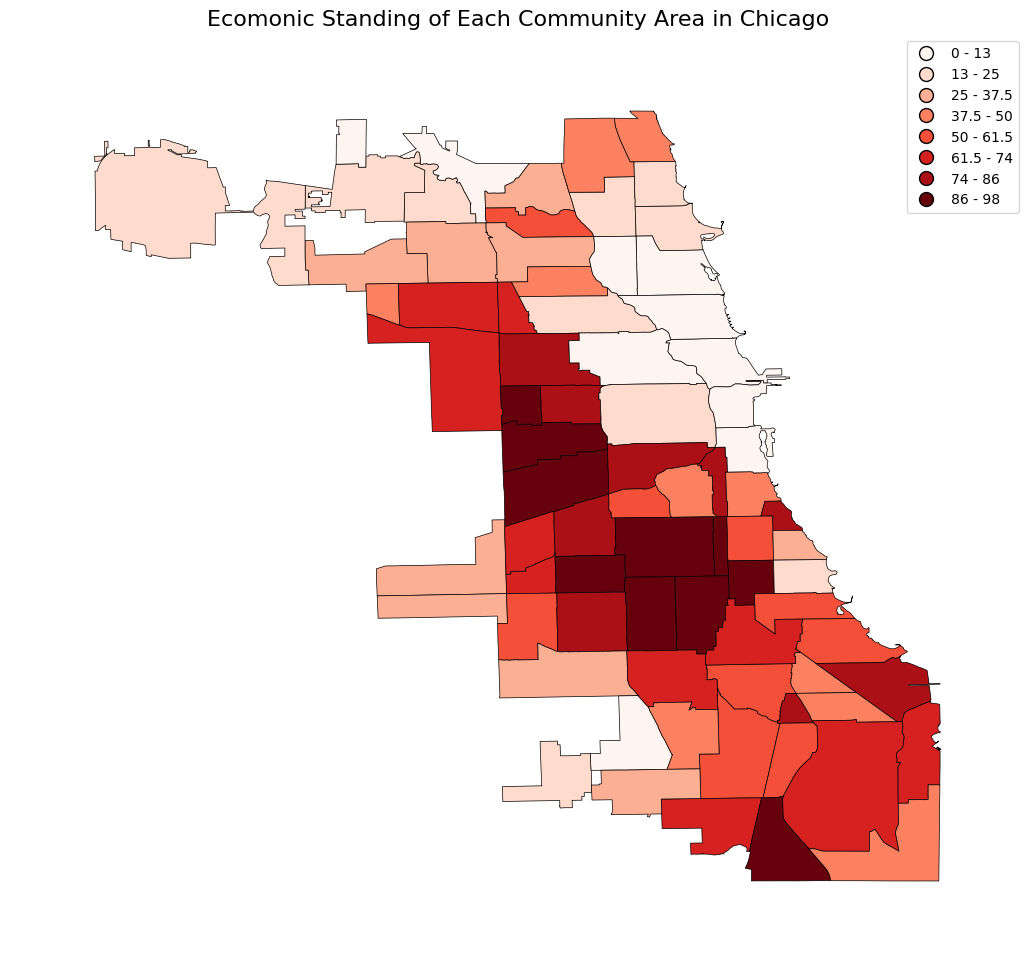

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
gplt.choropleth(map_data_hardship, hue="HARDSHIP INDEX", linewidth=.5, scheme=scheme_hardship, cmap = 'Reds', legend=True, edgecolor='black', ax=ax)
ax.set_title("Ecomonic Standing of Each Community Area in Chicago", size = 16)